<a href="https://colab.research.google.com/github/caioomenezes/2Caio2.github/blob/main/Regress%C3%A3o%20Linear/Regress%C3%A3o_Linear_analises_de_Valor_de_producao_Agricola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importação da bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/amandacmelo/Projeto-Ciencia-de-Dados/main/dados_limpos.csv"
dados = pd.read_csv(url, sep=",")

dados.columns

dados_numericas = dados.select_dtypes(include=['number'])
dados_numericas.columns

Index(['Ano', 'CDMunicipio', 'Populacao', 'PessoalOcupado',
       'PessoalAssalariado', 'VrSalarios', 'PIB', 'QtEmpresas',
       'AreaPlantada_h', 'AreaColhida_h', 'VlProducaoAgricola',
       'VlProducaoPecuaria', 'Area', 'Importacoes_US$', 'Exportacoes_US$',
       'Receitas_R$', 'Transferencias_correntes_R$',
       'Transferencias_capital_R$', 'NrNascimentos', 'NrObitosInfantis',
       'povoamento', 'PIB_PerCapita', 'Densidade_Populacional',
       'Proporcao_PessoalAssalariado', 'Proporcao_Area_Plantada'],
      dtype='object')

# **📈 Correlação entre as colunas do dataset**

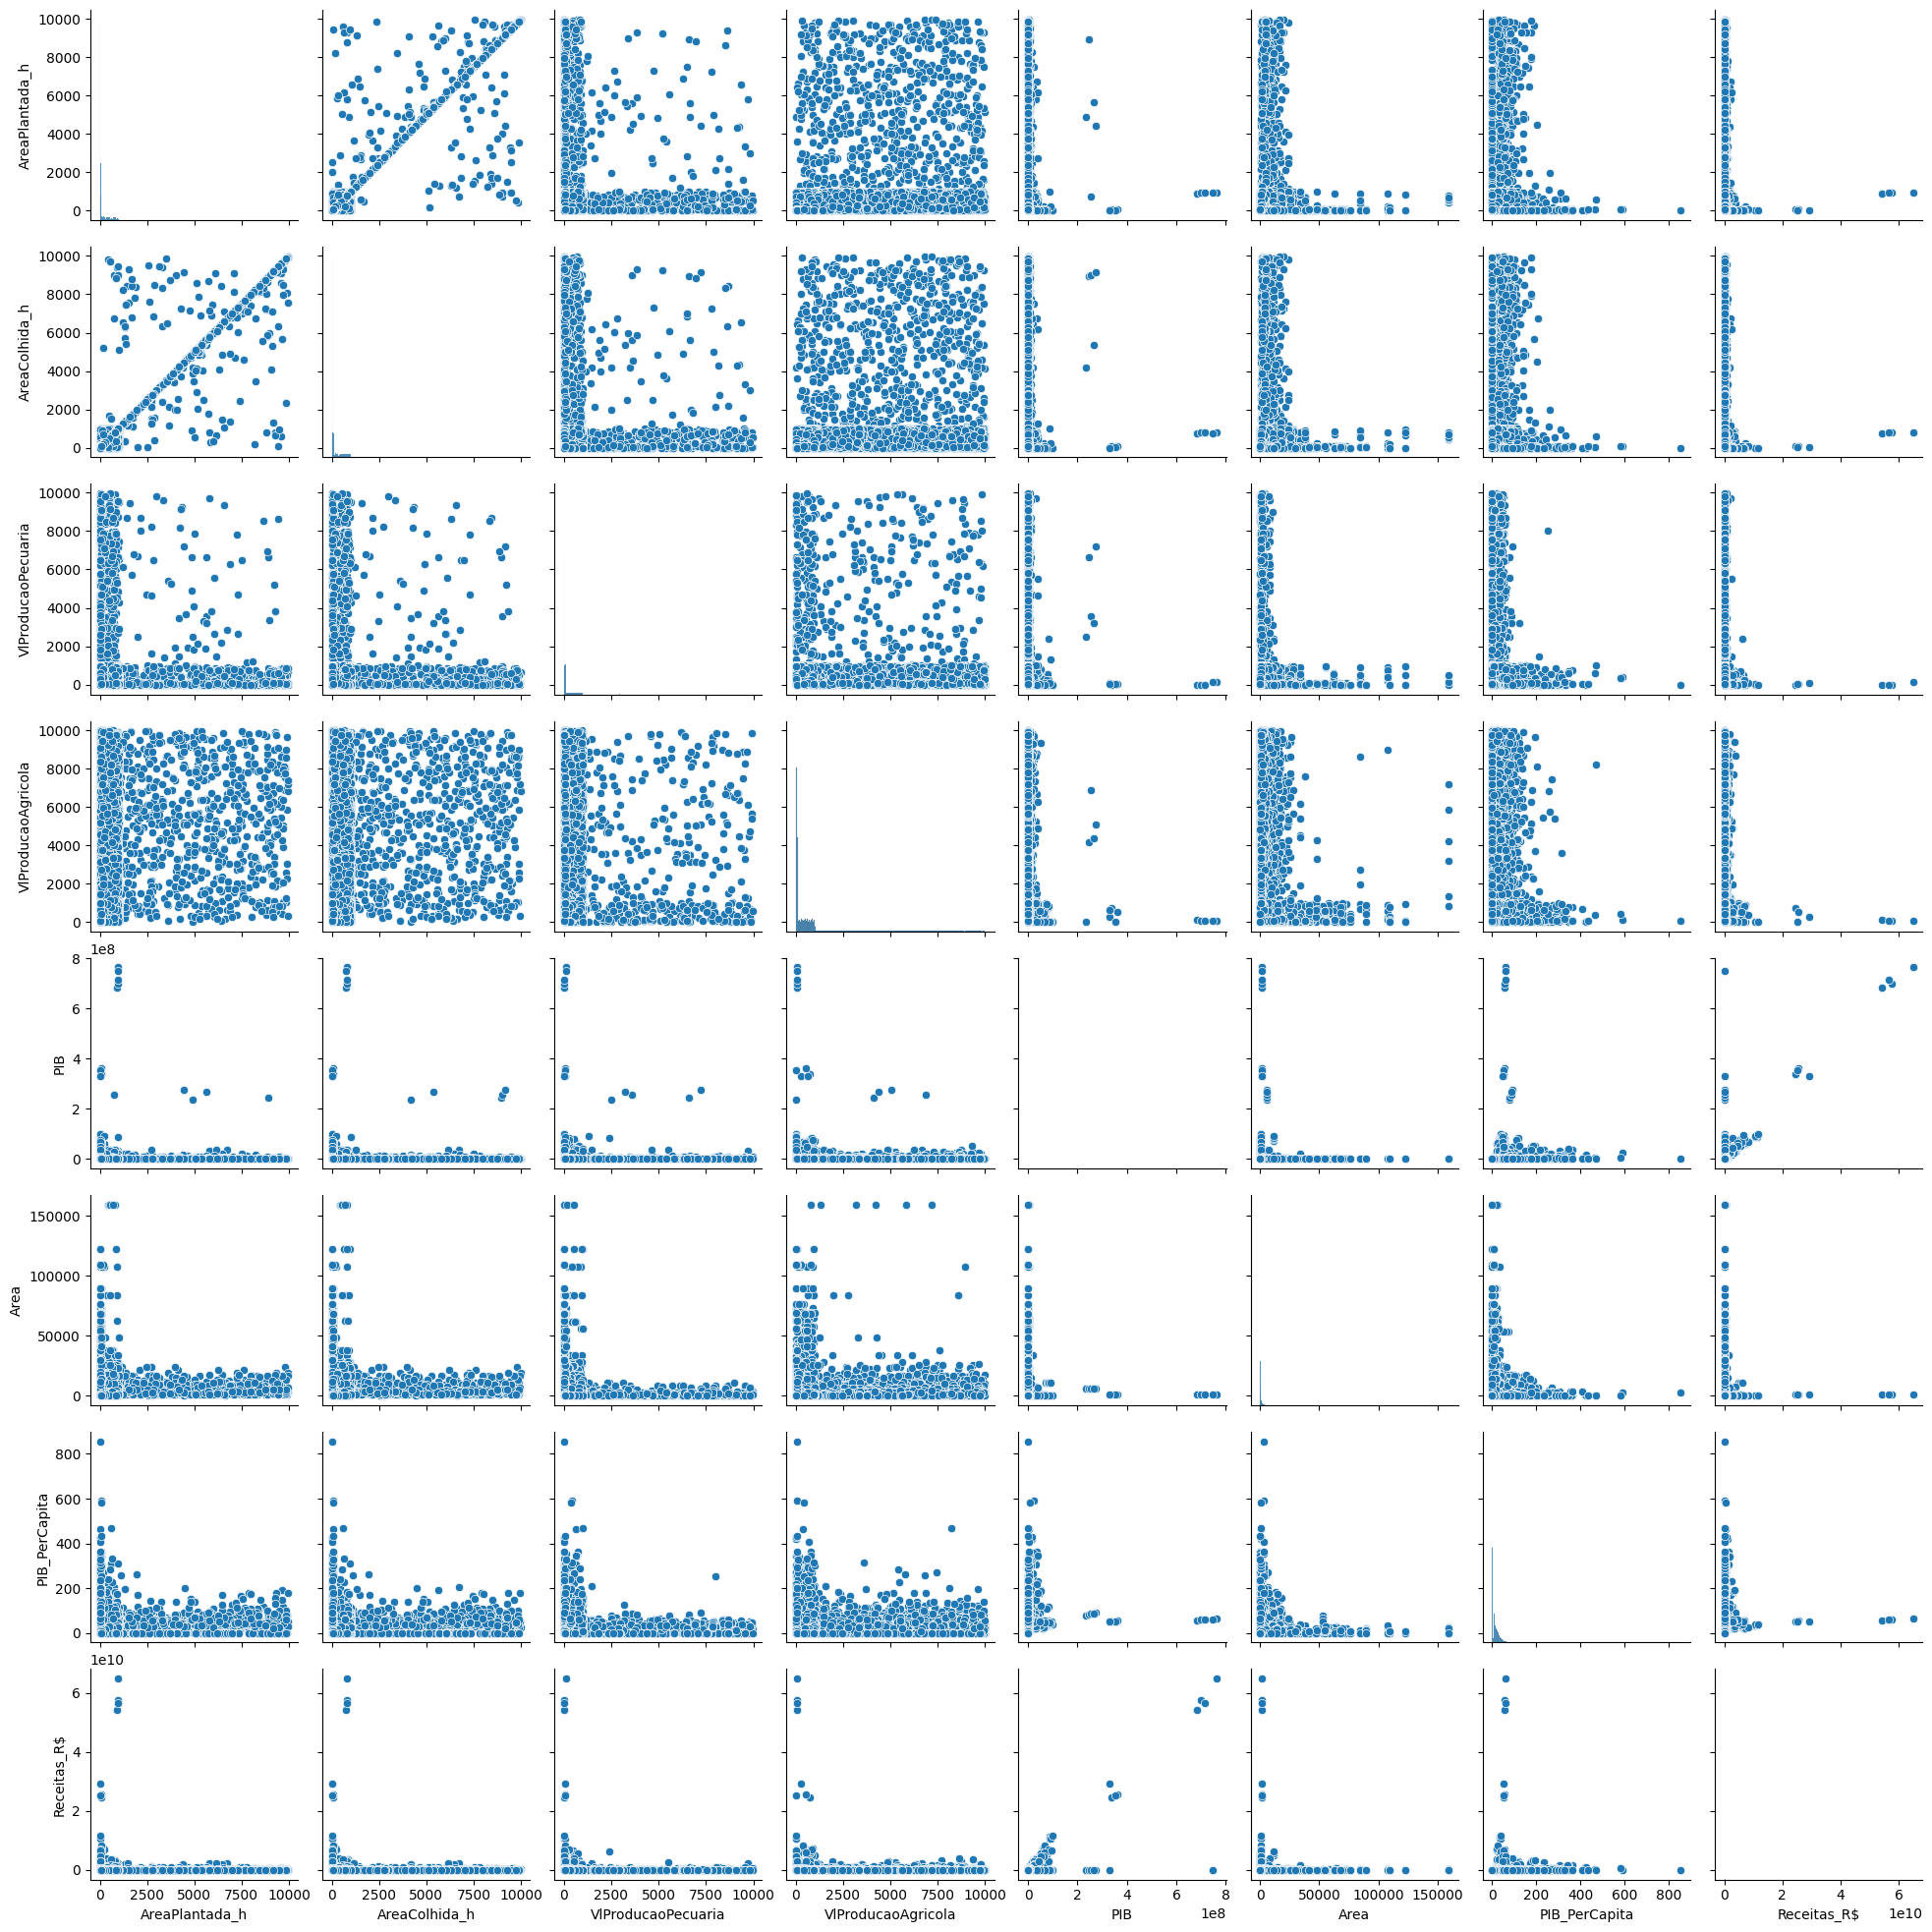

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(dados[['AreaPlantada_h','AreaColhida_h', 'VlProducaoPecuaria', 'VlProducaoAgricola', 'PIB', 'Area', 'PIB_PerCapita','Receitas_R$' ]])

A partir dos gráficos é possivel observarmos que a maior parte das colunas analisadas possuem pouca ou quase nenhuma relação umas com as outras.

Como já esperado, as colunas que possuem grande correlação são as de **'AreaPlantada_h' e 'AreaColhida_h'**, evidenciada pela formação de um padrão linear bem definido. Isso nos sugere que áreas mais plantadas resultam, proporcionalmente, em áreas com maior colheita — uma relação que de certa forma é intuitiva.

# 🟢 **Regressão- Quais fatores e aspectos que mais influenciam a produção agrícola?**

Seguindo a análise de correlação realizada nos gráficos da primeira etapa, foi identificado que **muitas variáveis não apresentaram uma correlação linear forte com o valor da produção agrícola**. Ainda assim, nesta etapa do projeto, optamos por aplicar uma regressão linear - utilizando o modelo LinearRegression, com o objetivo de estimar o valor da produção agrícola de um município, utilizando as seguintes variáveis:

- AreaColhida_h: área efetivamente colhida no município;

- regiao_agricola: variável binária que indica se o município está localizado em uma região com vocação agrícola (variavel criada neste notebook);

- VlProducaoPecuaria: valor da produção pecuária no município;

- AreaPlantada_h: área plantada no município;

- Area: área total do município;

- Importacoes e Exportacoes: volume de importações e exportações;

- PIB: Produto Interno Bruto, representando a soma dos bens e serviços produzidos localmente.

Vale ressaltar de que, para essa análise, foram utilizados dados previamente filtrados e tratados na etapa anterior, desconsiderando-se colunas com valores iguais a zero.



Primeiramente, para a análise, é importante relembrar quais as regiões brasileiras que possuem grande influencia da atividade agricola. Tais informações serão importantes para definir os 0 ou 1 da coluna de Região agrícola.

In [ ]:
soma_por_regiao = dados.groupby("Regiao")["AreaPlantada_h"].sum()
print(soma_por_regiao)

Regiao
Centro-Oeste    2890821
Nordeste        1265990
Norte            526170
Sudeste         2049930
Sul             2445190
Name: AreaPlantada_h, dtype: int64


In [ ]:
regioes = []

for regiao in dados['Regiao']:
    if regiao == 'Centro-Oeste'or regiao == 'Sul':
        regioes.append(1)
    else:
        regioes.append(0)

dados['regiao_agricola'] = regioes

Seguindo os resultados obtidos anteriormente definimos que as regiões Sul e Centro-Oeste serão marcadas com 1, ou seja, consideradas as áreas com maior influencia agrícola.

Em seguida, utilizando das colunas selecionadas anteriormente, realizamos a regressão.

In [ ]:

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

X = dados[['AreaColhida_h', 'regiao_agricola', 'VlProducaoPecuaria', 'AreaPlantada_h','VlProducaoPecuaria', 'Area', 'Importacoes_US$', 'Exportacoes_US$','PIB']]
y = dados[ 'VlProducaoAgricola']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("Erro médio Absoluto (MAE):", mean_absolute_error(y_test, y_pred))
#print("Erro quadrático médio (MSE):", mean_squared_error(y_test, y_pred))

print("\nCoeficientes:")
for i, var in enumerate(X.columns):
    print(f"{var}: {modelo.coef_[i]:.6f}")



R²: 0.15358968795346917
Erro médio Absoluto (MAE): 1211.0736432698152

Coeficientes:
AreaColhida_h: 0.393797
regiao_agricola: 702.015853
VlProducaoPecuaria: 0.117522
AreaPlantada_h: 0.356159
VlProducaoPecuaria: 0.117520
Area: 0.015247
Importacoes_US$: 0.000000
Exportacoes_US$: -0.000000
PIB: -0.000002


## **Análise dos Resultados**

Como antecipado na análise exploratória, o modelo apresentou um desempenho relativamente baixo, com um coeficiente de determinação (R²) de aproximadamente 0,153, o que indica que **15,3% da variação no valor da produção agrícola pode ser explicada pelas variáveis selecionadas.**

O erro médio absoluto (MAE) também foi uma métrica essencial para esta análise, pois, a partir dele, podemos observar de forma clara e direta o quanto o modelo se desvia, em média, ao prever o valor da produção agrícola, utilizando as mesmas unidades da variável analisada. Diferentemente do erro quadrático médio (MSE), que penaliza mais fortemente os grandes erros ao elevá-los ao quadrado — o que pode exagerar o impacto de certos valores —, o MAE oferece uma avaliação mais equilibrada. Por isso, nesta análise, o MAE foi mais representativo para entender a proximidade das previsões do modelo de regressão com os valores reais.

Desta maneira, com um MAE de cerca de **1203,51** reais, podemos concluir de que o erro entre as previsões do modelo de regressão e os valores reais foi aceitavel para a situação e modelo propostos.

Por fim, com relação às variáveis explicativas, a maioria apresentou coeficientes relativamente baixos, sugerindo uma influência limitada sobre a variável dependente. Entre elas, a que mais se destacou foi região agrícola e Area plantada, que obtiveram valores maiores que os demais.Por outro lado, as variáveis com **menor impacto foram as Exportações e Importações e o PIB**, cujo coeficiente foi praticamente nulo, o que indica que essas variáveis não tiveram quase nenhuma contribuição relevante para o modelo.




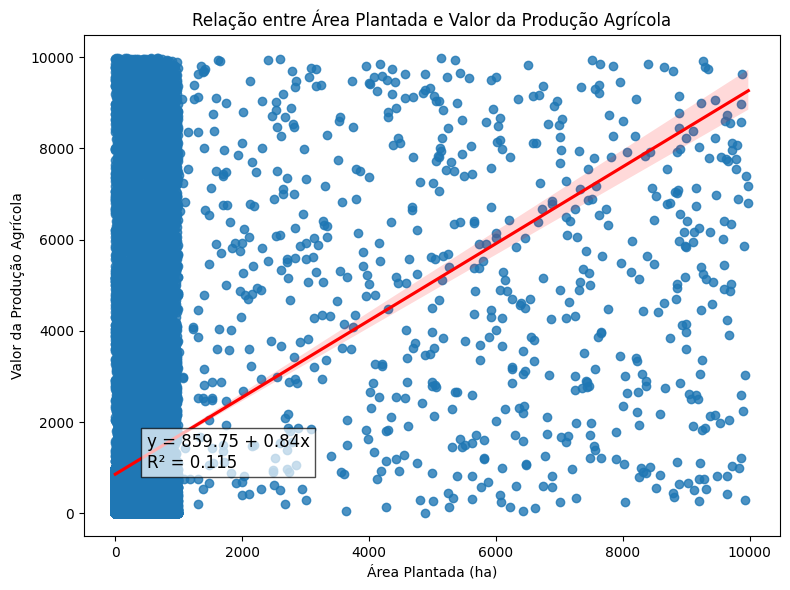

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

x = dados['AreaPlantada_h']
y = dados['VlProducaoAgricola']

slope, intercept, r_value, p_value, std_err = linregress(x, y)

plt.figure(figsize=(8,6))
sns.regplot(x=x, y=y, line_kws={'color':'red'})

plt.xlabel('Área Plantada (ha)')
plt.ylabel('Valor da Produção Agrícola')
plt.title('Relação entre Área Plantada e Valor da Produção Agrícola')

texto_legenda = f'y = {intercept:.2f} + {slope:.2f}x\nR² = {r_value**2:.3f}'
plt.text(x.min() + (x.max()-x.min())*0.05, y.min() + (y.max()-y.min())*0.1,
         texto_legenda, fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

###**Conclusão**
Diante da pergunta **"Quais fatores e aspectos que mais influenciam a produção agrícola?"**, os resultados obtidos sugerem que fatores como área colhida, área plantada, valor da produção pecuária e região agrícola exercem alguma influência sobre a produção agrícola (mais especificamente do valor da produção) dos dados analisados.

No entanto, como o modelo apresentou um R² de apenas 15%, isso significa que a maior parte da variação nos dados ainda não é explicada pelas variáveis utilizadas. **Portanto, esses achados devem ser vistos como tendências, e não como conclusões totalmente definitivas.**